# Laboratorio 2 - Visión por Computadora
## Integrantes:

- Javier Alvarado - 21188
- Mario Guerra - 21008
- Emilio Solano - 21212

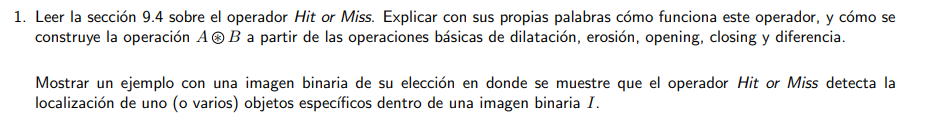

In [ ]:
# Código para Ejercicio 1

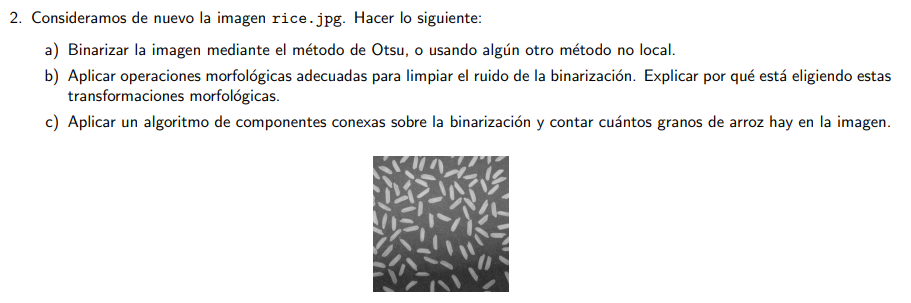

In [ ]:
# Código para Ejercicio 2

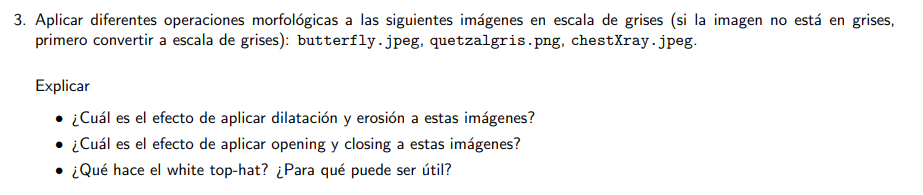

In [ ]:
# Código para Ejercicio 3

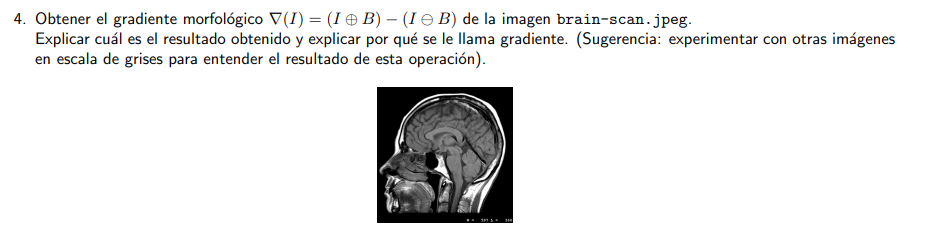

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

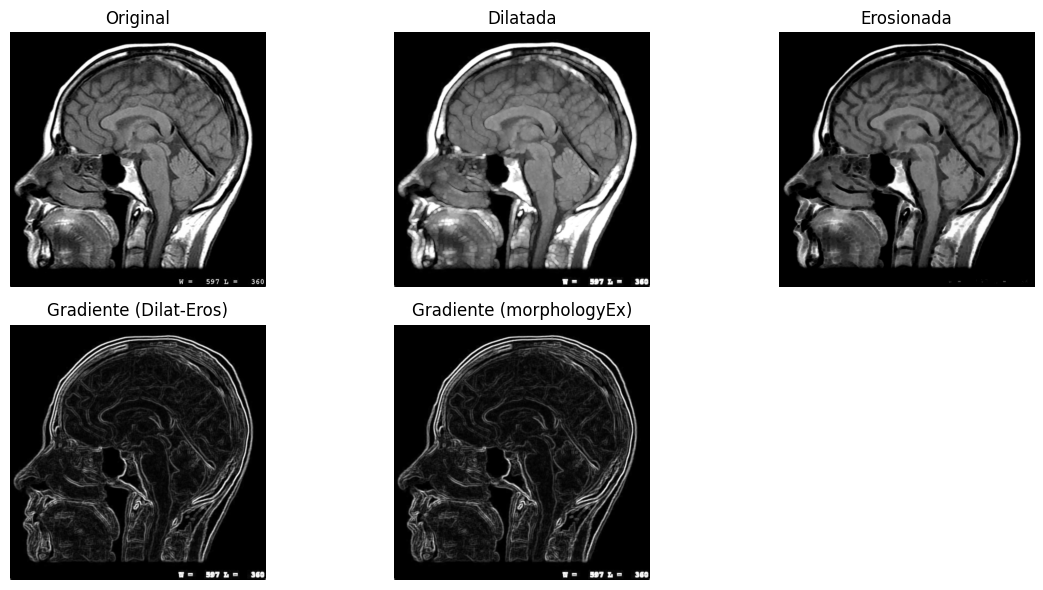

In [ ]:
imagen = cv2.imread('./assets/brain-scan.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)

# --- MÉTODO 1: DILATACIÓN Y EROSIÓN POR SEPARADO ---


dilatada = cv2.dilate(imagen, kernel, iterations=1)

erosionada = cv2.erode(imagen, kernel, iterations=1)

gradiente_manual = dilatada - erosionada


# --- MÉTODO 2: USANDO morphologyEx ---
gradiente_opencv = cv2.morphologyEx(imagen, cv2.MORPH_GRADIENT, kernel)


plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(dilatada, cmap='gray')
plt.title('Dilatada')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(erosionada, cmap='gray')
plt.title('Erosionada')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gradiente_manual, cmap='gray')
plt.title('Gradiente (Dilat-Eros)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gradiente_opencv, cmap='gray')
plt.title('Gradiente (morphologyEx)')
plt.axis('off')

plt.tight_layout()
plt.show()


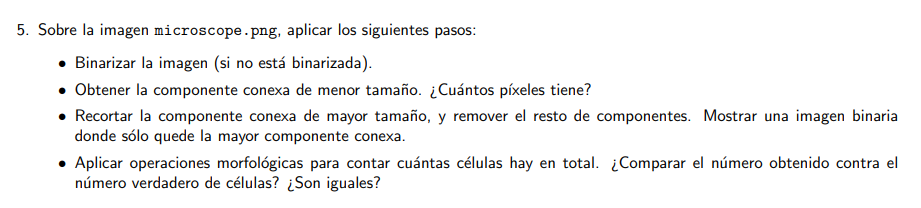

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

La componente conexa de menor tamaño tiene 158 píxeles.
La componente conexa de mayor tamaño tiene 4177 píxeles.


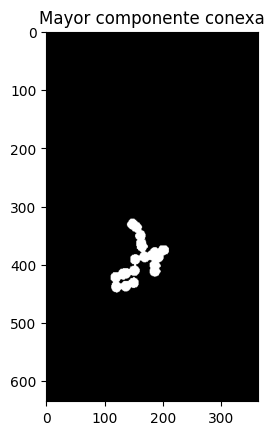

El conteo de células tras la segmentación morfológica es: 125


In [ ]:
# 1) Cargar la imagen en escala de grises
img_gray = cv2.imread('./assets/microscope.png', cv2.IMREAD_GRAYSCALE)

# 2) Binarizar la imagen
_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

areas = stats[:, cv2.CC_STAT_AREA]

min_area_idx = np.argmin(areas[1:]) + 1  
min_area = areas[min_area_idx]
print(f"La componente conexa de menor tamaño tiene {min_area} píxeles.")

max_area_idx = np.argmax(areas[1:]) + 1
max_area = areas[max_area_idx]
print(f"La componente conexa de mayor tamaño tiene {max_area} píxeles.")

largest_comp_mask = np.zeros_like(img_bin, dtype=np.uint8)
largest_comp_mask[labels == max_area_idx] = 255

plt.imshow(largest_comp_mask, cmap='gray')
plt.title("Mayor componente conexa")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)

num_labels_morph, labels_morph, stats_morph, centroids_morph = cv2.connectedComponentsWithStats(opened, connectivity=8)
num_celulas = num_labels_morph - 1

print(f"El conteo de células tras la segmentación morfológica es: {num_celulas}")


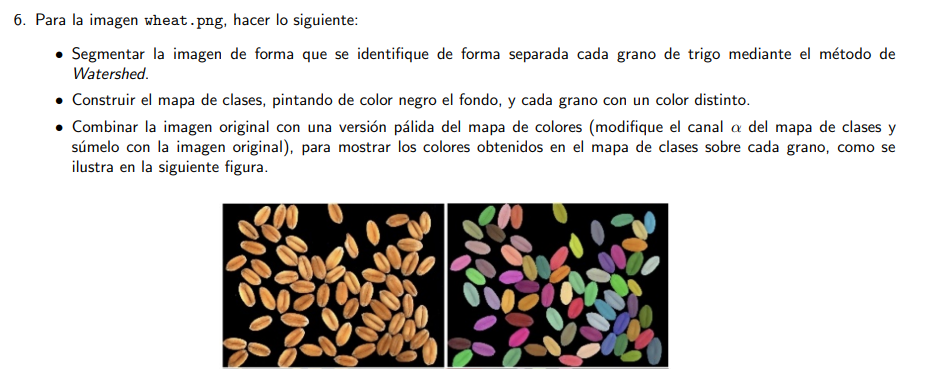

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

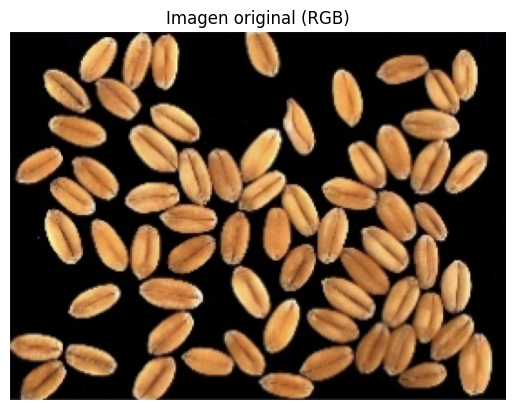

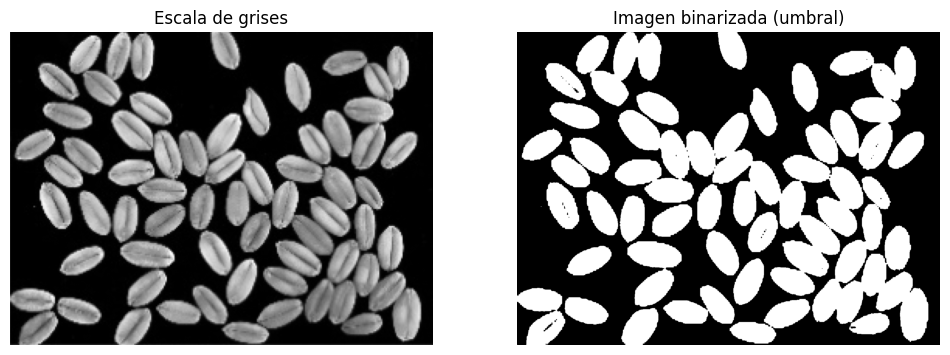

In [ ]:
# Leemos la imagen original
img_bgr = cv2.imread('./assets/wheat.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Imagen original (RGB)")
plt.axis('off')
plt.show()

# Convertimos a gris
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Usamos OTSU para obtener un umbral automático
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Escala de grises")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(thresh, cmap='gray')
plt.title("Imagen binarizada (umbral)")
plt.axis('off')
plt.show()

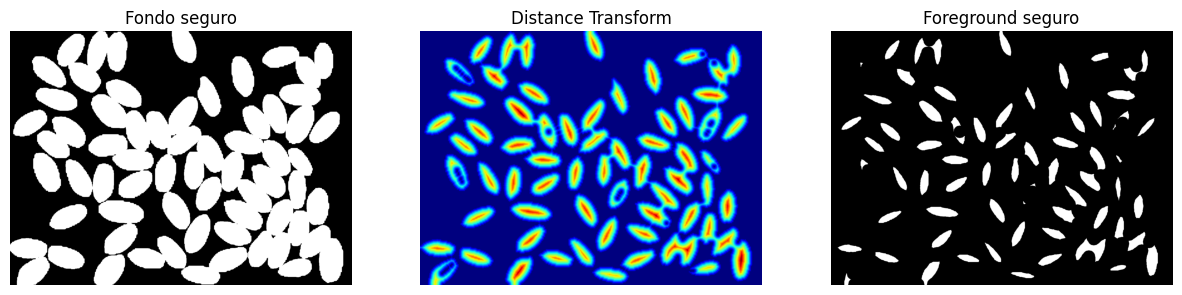

In [ ]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

dist_threshold = 0.5 * dist_transform.max()
_, sure_fg = cv2.threshold(dist_transform, dist_threshold, 255, 0)
sure_fg = np.uint8(sure_fg)

# Regiones desconocidas = fondo seguro - foreground seguro
unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1); plt.imshow(sure_bg, cmap='gray'); plt.title("Fondo seguro"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(dist_transform, cmap='jet'); plt.title("Distance Transform"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(sure_fg, cmap='gray'); plt.title("Foreground seguro"); plt.axis('off')
plt.show()


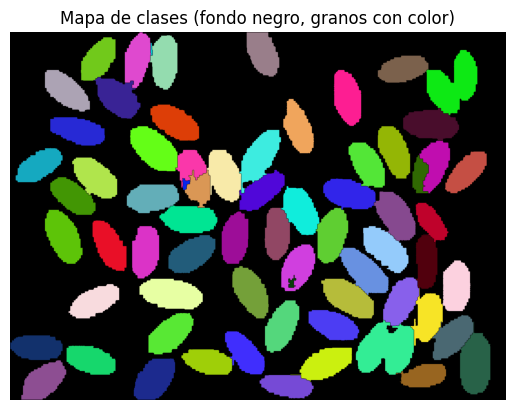

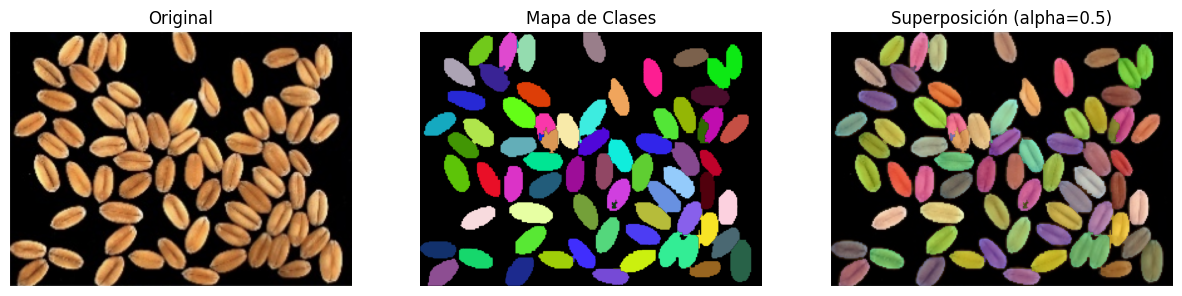

In [ ]:
num_markers, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1

markers[unknown == 255] = 0

# Aplicamos Watershed
markers = cv2.watershed(img_bgr, markers)

unique_labels = np.unique(markers)
unique_labels = unique_labels[unique_labels != -1] 

label_to_color = {}
for label in unique_labels:
    if label == 1:
        label_to_color[label] = (0, 0, 0)
    else:
        # Color aleatorio
        color = np.random.randint(0, 256, size=3)
        label_to_color[label] = (int(color[0]), int(color[1]), int(color[2]))

# Construimos la imagen de salida
class_map = np.zeros_like(img_rgb)
rows, cols = markers.shape
for r in range(rows):
    for c in range(cols):
        m = markers[r, c]
        if m == -1:
            class_map[r, c] = (0, 0, 0)  
        else:
            class_map[r, c] = label_to_color[m]

plt.imshow(class_map)
plt.title("Mapa de clases (fondo negro, granos con color)")
plt.axis('off')
plt.show()


alpha = 0.5
beta = 1.0 - alpha

class_map_bgr = cv2.cvtColor(class_map, cv2.COLOR_RGB2BGR)
blended_bgr = cv2.addWeighted(img_bgr, beta, class_map_bgr, alpha, 0)
blended_rgb = cv2.cvtColor(blended_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(class_map)
plt.title("Mapa de Clases")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blended_rgb)
plt.title("Superposición (alpha={})".format(alpha))
plt.axis('off')
plt.show()



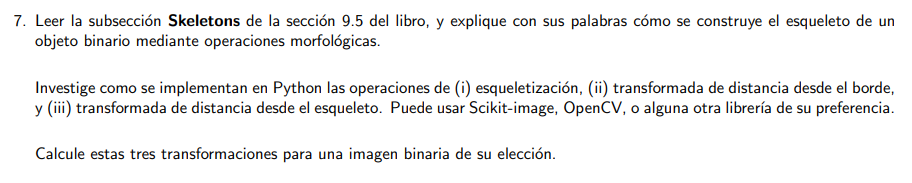

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.color import rgb2gray

In [50]:
# Imagen binaria (líneas ramificadas)
img_size = 200
binary_img = np.zeros((img_size, img_size), dtype=np.uint8)

# Dibujar líneas ramificadas
cv2.line(binary_img, (50, 150), (150, 50), 255, 2)
cv2.line(binary_img, (50, 50), (150, 150), 255, 2)
cv2.line(binary_img, (100, 30), (100, 170), 255, 2)
cv2.line(binary_img, (30, 100), (170, 100), 255, 2)
cv2.line(binary_img, (75, 75), (125, 125), 255, 2)
cv2.line(binary_img, (75, 125), (125, 75), 255, 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [51]:
# Normalización
binary_img_norm = binary_img > 0

In [52]:
# (i) Esqueletización
skeleton = skeletonize(binary_img_norm)

# (ii) Transformada de distancia desde el borde
dist_transform_edge = cv2.distanceTransform(255 - binary_img, cv2.DIST_L2, 5)

# (iii) Transformada de distancia desde el esqueleto
skeleton_uint8 = (skeleton * 255).astype(np.uint8)
dist_transform_skeleton = cv2.distanceTransform(255 - skeleton_uint8, cv2.DIST_L2, 5)

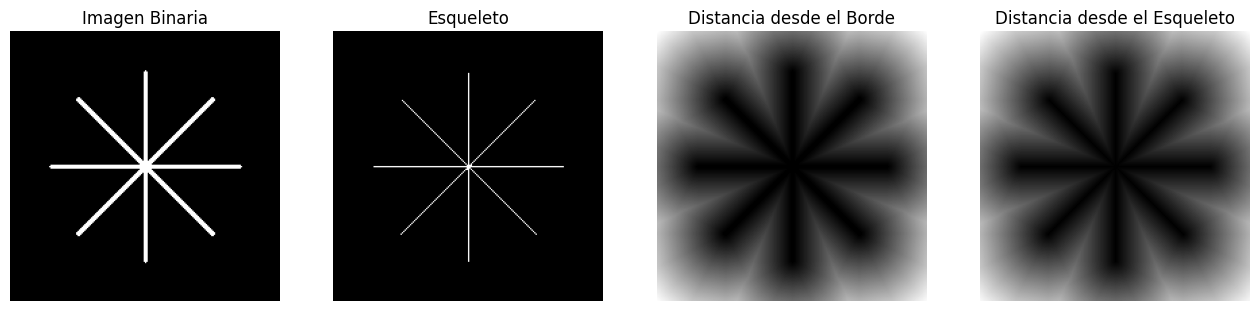

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles = ["Imagen Binaria", "Esqueleto", "Distancia desde el Borde", "Distancia desde el Esqueleto"]
images = [binary_img, skeleton, dist_transform_edge, dist_transform_skeleton]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


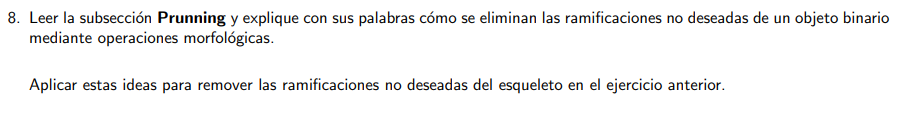

In [54]:
from skimage.morphology import remove_small_objects
from scipy.ndimage import convolve

In [55]:
# Detectar endpoints usando un kernel de convolución
def find_endpoints(skeleton):
    kernel = np.array([[1,  1,  1],
                       [1, 10,  1],
                       [1,  1,  1]])
    
    conv_result = convolve(skeleton.astype(int), kernel, mode='constant', cval=0)
    return (conv_result == 11)

In [56]:
# Eliminar ramificaciones no deseadas
def prune_skeleton(skeleton, iterations=5):
    """Elimina ramificaciones pequeñas eliminando endpoints iterativamente."""
    skeleton = skeleton.copy()
    for _ in range(iterations):
        endpoints = find_endpoints(skeleton)
        skeleton[endpoints] = 0 
    return skeleton

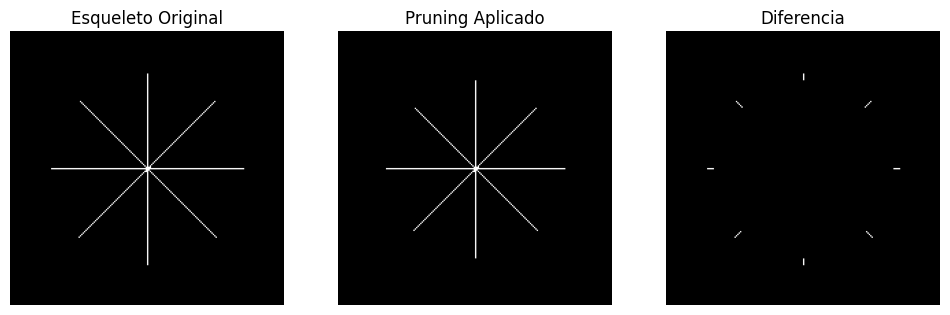

In [57]:
# Aplicar pruning
pruned_skeleton = prune_skeleton(skeleton, iterations=5)

# Graficar los resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ["Esqueleto Original", "Pruning Aplicado", "Diferencia"]

axes[0].imshow(skeleton, cmap='gray')
axes[0].set_title(titles[0])
axes[1].imshow(pruned_skeleton, cmap='gray')
axes[1].set_title(titles[1])
axes[2].imshow(np.logical_xor(skeleton, pruned_skeleton), cmap='gray')  # Corrección aquí
axes[2].set_title(titles[2])

for ax in axes:
    ax.axis('off')

plt.show()